# Project Work 4 - Data Report

## How weather can influence Nordic countries' inflation between 2015-2019

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the datasets

In [3]:
import os
from kaggle import KaggleApi

# Load the datasets
data_path = './data'
db_name = 'temperature_inflation.db'
# Kaggle dataset identifiers
URL_1 = "adamwurdits/finland-norway-and-sweden-weather-data-20152019"
URL_2 = "sazidthe1/global-inflation-data"
# Download datasets from Kaggle
api = KaggleApi()
api.authenticate()

api.dataset_download_files(URL_1, path=data_path, unzip=True)
api.dataset_download_files(URL_2, path=data_path, unzip=True)

csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

inflation_data = pd.read_csv(os.path.join(data_path, csv_files[0]))
weather_data = pd.read_csv(os.path.join(data_path, csv_files[1]))

# Display the first few rows of each dataset
display(weather_data.head())
display(inflation_data.head())

Dataset URL: https://www.kaggle.com/datasets/adamwurdits/finland-norway-and-sweden-weather-data-20152019
Dataset URL: https://www.kaggle.com/datasets/sazidthe1/global-inflation-data


,country,date,precipitation,snow_depth,tavg,tmax,tmin
0,Finland,1/1/2015,1.714141,284.545455,1.428571,2.912739,-1.015287
1,Finland,1/2/2015,10.016667,195.000000,0.553571,2.358599,-0.998718
2,Finland,1/3/2015,3.956061,284.294118,-1.739286,0.820382,-3.463871
3,Finland,1/4/2015,0.246193,260.772727,-7.035714,-3.110828,-9.502581
4,Finland,1/5/2015,0.036364,236.900000,-17.164286,-8.727564,-19.004487


,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


### Data Cleaning and Transformation

In [4]:
# Convert date to datetime and extract year for weather data
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%m/%d/%Y')
weather_data['year'] = weather_data['date'].dt.year

# Reshape inflation data
inflation_data_melted = inflation_data.melt(id_vars=["country_name", "indicator_name"],
                                            var_name="year",
                                            value_name="inflation_rate")
# Filter for the years 2015-2019
inflation_data_filtered = inflation_data_melted[inflation_data_melted['year'].astype(int).between(2015, 2019)]

# Merge the datasets on country and year
weather_data['country'] = weather_data['country'].str.strip()  # Remove any leading/trailing spaces
inflation_data_filtered['country_name'] = inflation_data_filtered[
    'country_name'].str.strip()  # Remove any leading/trailing spaces

# Rename columns for consistency
weather_data.rename(columns={'country': 'country_name'}, inplace=True)

# Convert year columns to integer
weather_data['year'] = weather_data['year'].astype(int)
inflation_data_filtered['year'] = inflation_data_filtered['year'].astype(int)

# Merge datasets
merged_data = pd.merge(weather_data, inflation_data_filtered,
                       how='inner',
                       left_on=['country_name', 'year'],
                       right_on=['country_name', 'year'])

# merged_data.to_sql('merged_data', if_exists='replace', index=False)

# Display the merged data
display(merged_data.head())

C:\Users\kiara\AppData\Local\Temp\ipykernel_10396\2536368404.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_data_filtered['country_name'] = inflation_data_filtered[
C:\Users\kiara\AppData\Local\Temp\ipykernel_10396\2536368404.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_data_filtered['year'] = inflation_data_filtered['year'].astype(int)


,country_name,date,precipitation,snow_depth,tavg,tmax,tmin,year,indicator_name,inflation_rate
0,Finland,2015-01-01,1.714141,284.545455,1.428571,2.912739,-1.015287,2015,Annual average inflation (consumer prices) rate,-0.2
1,Finland,2015-01-02,10.016667,195.000000,0.553571,2.358599,-0.998718,2015,Annual average inflation (consumer prices) rate,-0.2
2,Finland,2015-01-03,3.956061,284.294118,-1.739286,0.820382,-3.463871,2015,Annual average inflation (consumer prices) rate,-0.2
3,Finland,2015-01-04,0.246193,260.772727,-7.035714,-3.110828,-9.502581,2015,Annual average inflation (consumer prices) rate,-0.2
4,Finland,2015-01-05,0.036364,236.900000,-17.164286,-8.727564,-19.004487,2015,Annual average inflation (consumer prices) rate,-0.2


### Correlation Analysis

In [5]:
# Calculate the correlation coefficient
correlation_finland = merged_data[merged_data['country_name'] == 'Finland'][['tavg', 'inflation_rate']].corr().iloc[
    0, 1]
correlation_norway = merged_data[merged_data['country_name'] == 'Norway'][['tavg', 'inflation_rate']].corr().iloc[0, 1]
correlation_sweden = merged_data[merged_data['country_name'] == 'Sweden'][['tavg', 'inflation_rate']].corr().iloc[0, 1]

# Print the correlation coefficients
print(f"Correlation between average temperature and inflation rate in Finland: {correlation_finland:.2f}")
print(f"Correlation between average temperature and inflation rate in Norway: {correlation_norway:.2f}")
print(f"Correlation between average temperature and inflation rate in Sweden: {correlation_sweden:.2f}")

Correlation between average temperature and inflation rate in Finland: -0.03
Correlation between average temperature and inflation rate in Norway: 0.02
Correlation between average temperature and inflation rate in Sweden: -0.03


### Visualization with Line Plots

C:\Users\kiara\AppData\Local\Temp\ipykernel_10396\2771957547.py:43: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kiara\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


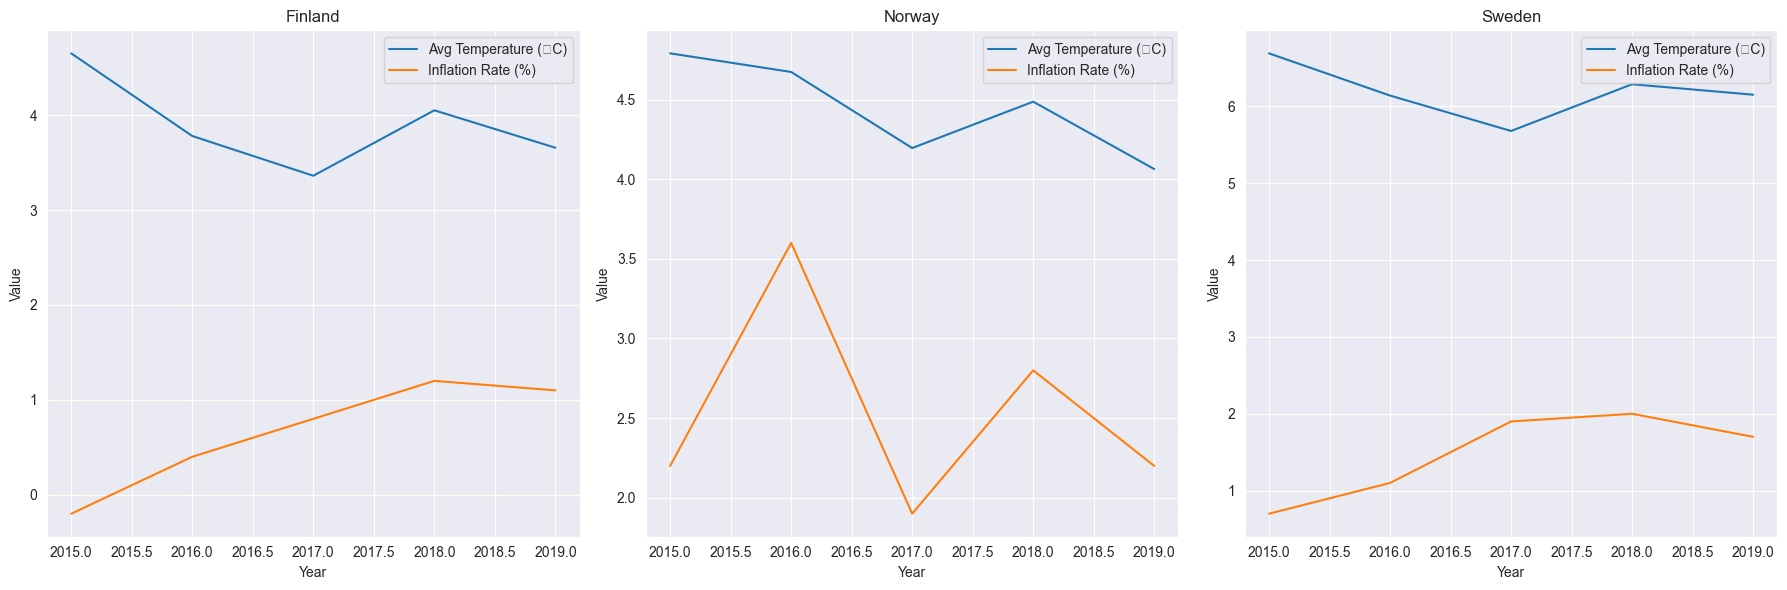

In [6]:
# Aggregate data by year and country
aggregated_data = merged_data.groupby(['country_name', 'year']).agg({
    'tavg': 'mean',
    'inflation_rate': 'mean'
}).reset_index()

# Plot the data
plt.figure(figsize=(18, 6))

# Finland
plt.subplot(1, 3, 1)
plt.plot(aggregated_data[aggregated_data['country_name'] == 'Finland']['year'],
         aggregated_data[aggregated_data['country_name'] == 'Finland']['tavg'], label='Avg Temperature (�C)')
plt.plot(aggregated_data[aggregated_data['country_name'] == 'Finland']['year'],
         aggregated_data[aggregated_data['country_name'] == 'Finland']['inflation_rate'], label='Inflation Rate (%)')
plt.title('Finland')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Norway
plt.subplot(1, 3, 2)
plt.plot(aggregated_data[aggregated_data['country_name'] == 'Norway']['year'],
         aggregated_data[aggregated_data['country_name'] == 'Norway']['tavg'], label='Avg Temperature (�C)')
plt.plot(aggregated_data[aggregated_data['country_name'] == 'Norway']['year'],
         aggregated_data[aggregated_data['country_name'] == 'Norway']['inflation_rate'], label='Inflation Rate (%)')
plt.title('Norway')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Sweden
plt.subplot(1, 3, 3)
plt.plot(aggregated_data[aggregated_data['country_name'] == 'Sweden']['year'],
         aggregated_data[aggregated_data['country_name'] == 'Sweden']['tavg'], label='Avg Temperature (�C)')
plt.plot(aggregated_data[aggregated_data['country_name'] == 'Sweden']['year'],
         aggregated_data[aggregated_data['country_name'] == 'Sweden']['inflation_rate'], label='Inflation Rate (%)')
plt.title('Sweden')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

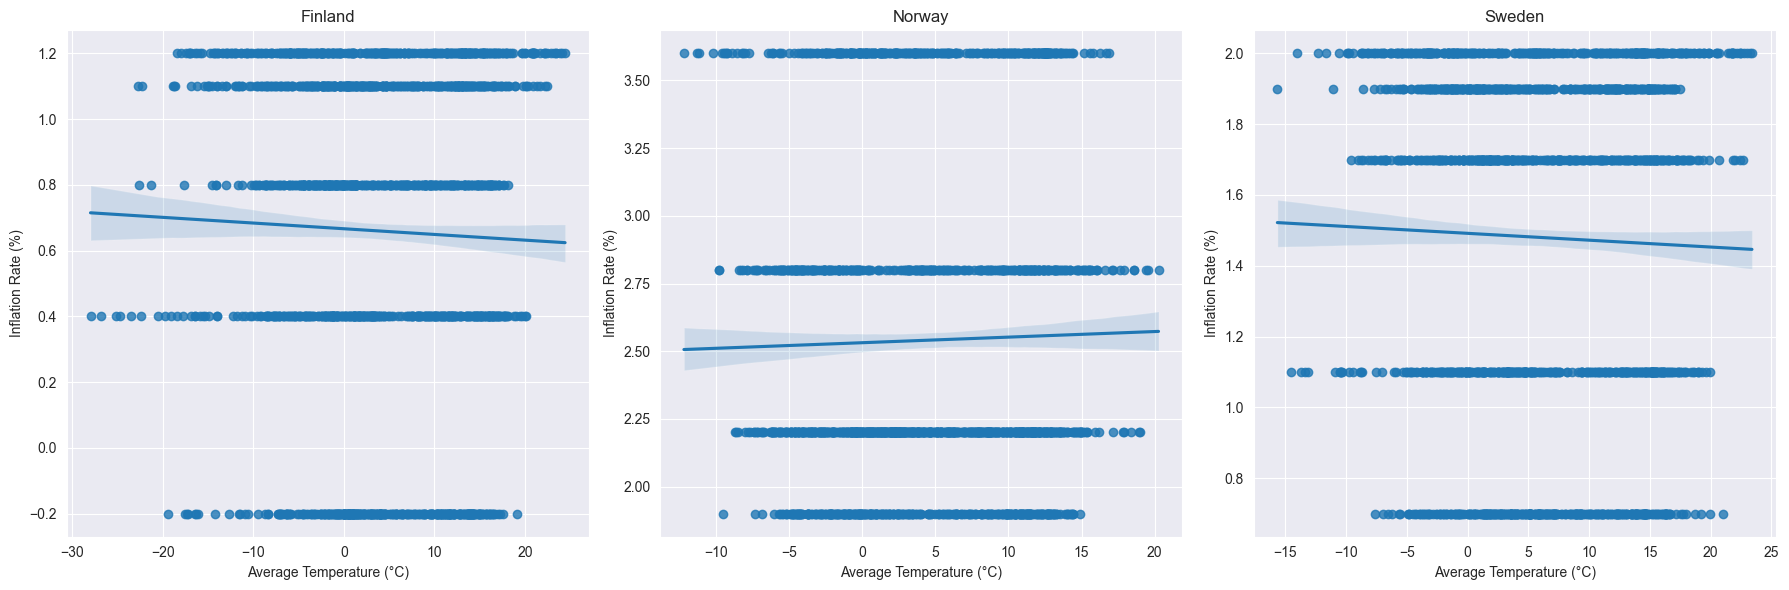

In [7]:
plt.figure(figsize=(18, 6))

# Finland
plt.subplot(1, 3, 1)
sns.regplot(data=merged_data[merged_data['country_name'] == 'Finland'], x='tavg', y='inflation_rate')
plt.title(f'Finland')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Inflation Rate (%)')

# Norway
plt.subplot(1, 3, 2)
sns.regplot(data=merged_data[merged_data['country_name'] == 'Norway'], x='tavg', y='inflation_rate')
plt.title(f'Norway')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Inflation Rate (%)')

# Sweden
plt.subplot(1, 3, 3)
sns.regplot(data=merged_data[merged_data['country_name'] == 'Sweden'], x='tavg', y='inflation_rate')
plt.title(f'Sweden')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Inflation Rate (%)')

plt.tight_layout()
plt.show()